In [21]:
# Import the necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


# Define the model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, embedding_dims)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


# Evaluate the model on test data
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


NameError: name 'maxlen' is not defined

In [10]:
import pandas as pd
df = pd.read_csv("training_lsmt.csv",encoding='latin-1',header=None)
df.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [12]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_name', 'tweet']

In [13]:
df = df.drop(['id', 'date', 'query', 'user_name'], axis=1)
df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [16]:
label_to_sentiment = {0:"Negative", 4:"Positive"}
def mapper(label):
     return label_to_sentiment[label]
#df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder() 
#encoder.inverse_transform()

df.sentiment = df.sentiment.apply(lambda x: encoder.inverse_transform(x))

<BarContainer object of 2 artists>

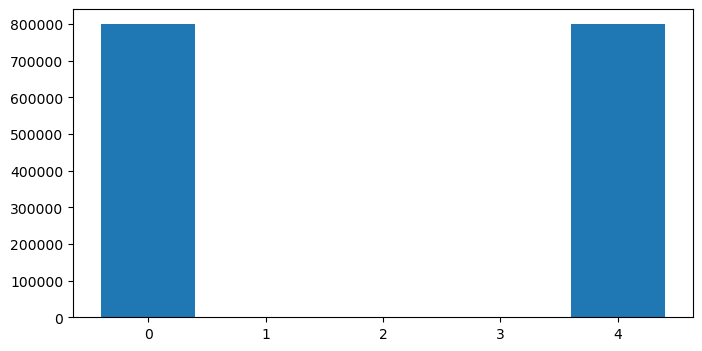

In [25]:
import matplotlib.pyplot as plt
distribution = df.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(distribution.index, distribution.values)